In [8]:
import json
import pandas as pd

# Load data

Import Spotify API data stored in a JSON text file

In [18]:
with open("i95_features.txt", 'r') as f:
    i95_features = json.load(f)
# print(i95_features)

In [7]:
with open("saved_features.txt", 'r') as f:
    saved_features = json.load(f)
#print(saved_features)

Make dataframes

In [19]:
i95 = pd.DataFrame(i95_features)
saved = pd.DataFrame(saved_features)
print(i95.shape, saved.shape)

(227, 18) (1808, 18)


In [20]:
i95.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.593,0.807,2,-7.995,1,0.0371,0.000125,0.000210,0.0914,0.521,116.077,audio_features,1AEiKr56njftNDp67QCnHH,spotify:track:1AEiKr56njftNDp67QCnHH,https://api.spotify.com/v1/tracks/1AEiKr56njft...,https://api.spotify.com/v1/audio-analysis/1AEi...,216787,4
1,0.565,0.718,10,-8.428,1,0.0281,0.002270,0.000086,0.0812,0.509,85.433,audio_features,7yIoiP1spudd0cuRL6NB9E,spotify:track:7yIoiP1spudd0cuRL6NB9E,https://api.spotify.com/v1/tracks/7yIoiP1spudd...,https://api.spotify.com/v1/audio-analysis/7yIo...,244360,4
2,0.302,0.705,9,-7.061,1,0.0297,0.091300,0.022700,0.0976,0.865,173.289,audio_features,4zdEcOj9IEAE1cWG7zzYxB,spotify:track:4zdEcOj9IEAE1cWG7zzYxB,https://api.spotify.com/v1/tracks/4zdEcOj9IEAE...,https://api.spotify.com/v1/audio-analysis/4zdE...,229843,4
3,0.408,0.666,7,-6.286,1,0.0578,0.000455,0.862000,0.0889,0.666,82.523,audio_features,0OM9ri37LIbPc9hffwsyb1,spotify:track:0OM9ri37LIbPc9hffwsyb1,https://api.spotify.com/v1/tracks/0OM9ri37LIbP...,https://api.spotify.com/v1/audio-analysis/0OM9...,224333,4
4,0.620,0.593,7,-10.985,1,0.0281,0.294000,0.000000,0.0749,0.833,109.044,audio_features,4SPi5Pl7aAtauFsH9Lk5LB,spotify:track:4SPi5Pl7aAtauFsH9Lk5LB,https://api.spotify.com/v1/tracks/4SPi5Pl7aAta...,https://api.spotify.com/v1/audio-analysis/4SPi...,234907,4


# Preprocessing

## Reduce Dimensions

Drop key because it's not really a scalar value and duration because i don't care about that, and drop other extra columns

In [21]:
drop_cols = ['key', 'type', 'id', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
i95 = i95.drop(drop_cols, axis=1)
saved = saved.drop(drop_cols, axis=1)
i95.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri
0,0.593,0.807,-7.995,1,0.0371,0.000125,0.000210,0.0914,0.521,116.077,spotify:track:1AEiKr56njftNDp67QCnHH
1,0.565,0.718,-8.428,1,0.0281,0.002270,0.000086,0.0812,0.509,85.433,spotify:track:7yIoiP1spudd0cuRL6NB9E
2,0.302,0.705,-7.061,1,0.0297,0.091300,0.022700,0.0976,0.865,173.289,spotify:track:4zdEcOj9IEAE1cWG7zzYxB
3,0.408,0.666,-6.286,1,0.0578,0.000455,0.862000,0.0889,0.666,82.523,spotify:track:0OM9ri37LIbPc9hffwsyb1
4,0.620,0.593,-10.985,1,0.0281,0.294000,0.000000,0.0749,0.833,109.044,spotify:track:4SPi5Pl7aAtauFsH9Lk5LB


## Normalize Values

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
cols = ['loudness', 'tempo']

In [26]:
i95_to_scale = i95[cols]
normalized_i95 = scaler.fit_transform(i95_to_scale)
i95[cols] = normalized_i95

i95.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri
0,0.593,0.807,0.633893,1,0.0371,0.000125,0.000210,0.0914,0.521,0.329602,spotify:track:1AEiKr56njftNDp67QCnHH
1,0.565,0.718,0.612061,1,0.0281,0.002270,0.000086,0.0812,0.509,0.096247,spotify:track:7yIoiP1spudd0cuRL6NB9E
2,0.302,0.705,0.680986,1,0.0297,0.091300,0.022700,0.0976,0.865,0.765274,spotify:track:4zdEcOj9IEAE1cWG7zzYxB
3,0.408,0.666,0.720063,1,0.0578,0.000455,0.862000,0.0889,0.666,0.074087,spotify:track:0OM9ri37LIbPc9hffwsyb1
4,0.620,0.593,0.483134,1,0.0281,0.294000,0.000000,0.0749,0.833,0.276045,spotify:track:4SPi5Pl7aAtauFsH9Lk5LB


In [27]:
saved_to_scale = saved[cols]
normalized_saved = scaler.fit_transform(saved_to_scale)
saved[cols] = normalized_saved

saved.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri
0,0.946,0.289,0.668006,1,0.0584,0.152,0.000020,0.234,0.816,0.308045,spotify:track:4KqBoq7MoDJeVsvUHTjXCM
1,0.456,0.660,0.674088,1,0.0377,0.383,0.660000,0.113,0.527,0.376480,spotify:track:5lDoRJ2vW6G4YXeUciQd3R
2,0.559,0.661,0.692640,1,0.0323,0.578,0.000000,0.376,0.862,0.667200,spotify:track:2gzY74wkSgo1ts1IZbjxfT
3,0.573,0.388,0.495524,1,0.0269,0.218,0.001270,0.110,0.806,0.330186,spotify:track:7w1OJlqxiRxnC4ct8yNN1n
4,0.377,0.666,0.719532,1,0.0314,0.158,0.000621,0.339,0.637,0.426498,spotify:track:1mpv6hIbfG75txI9zJGcf4


# Explore Data

## Heatmap

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

Make feature matrices

In [45]:
i95_corr_matrix = i95.corr()
saved_corr_matrix = saved.corr()

overall_min = min(i95_corr_matrix.values.min(), saved_corr_matrix.values.min())
overall_max = max(i95_corr_matrix.values.max(), saved_corr_matrix.values.max())

Plot them

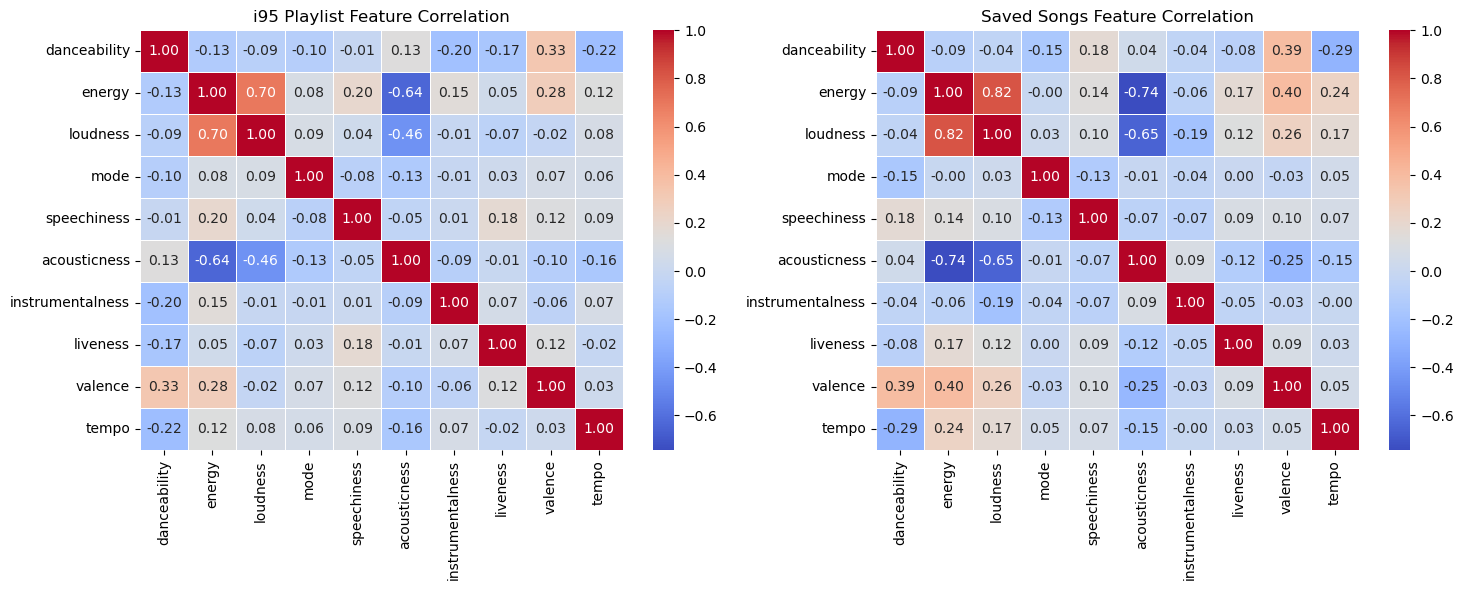

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.heatmap(i95_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=overall_min, vmax=overall_max, ax=axes[0])
axes[0].set_title('i95 Playlist Feature Correlation')

sns.heatmap(saved_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=overall_min, vmax=overall_max, ax=axes[1])
axes[1].set_title('Saved Songs Feature Correlation')
plt.tight_layout()
plt.show()

# Clustering

In [47]:
from sklearn.cluster import KMeans

Find optimal number of clusters

## Elbow Method

In [48]:
k_values = range(1, 11)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(saved_corr_matrix)
    wcss.append(kmeans.inertia_)

C:\Users\llaur\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


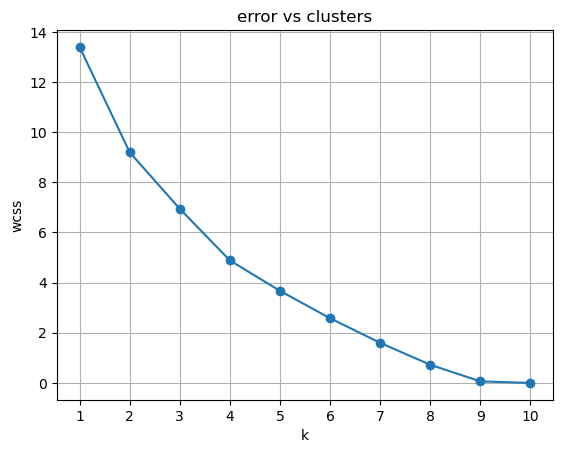

In [51]:
plt.plot(k_values, wcss, marker='o')
plt.title('error vs clusters')
plt.xlabel('k')
plt.ylabel('wcss')
plt.xticks(k_values)
plt.grid(True)
plt.show()